In [173]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn import preprocessing


In [571]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train contains the image data while y_train contains the corresponding labels that indicate which digit is represented by each image.

In [572]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test  = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

scaler = preprocessing.StandardScaler().fit(X_train)

In [586]:
# Define the desired imbalance ratio
imbalance_ratio = 0.9999

In [598]:
# Get the number of samples
num_samples = X_train.shape[0]

# Define the subsample ratio
subsample_ratio = 0.1 
#this equals 7000 cases, done because of memory errors that occured

# Compute the number of samples in the subsample
num_subsamples = int(np.ceil(num_samples * subsample_ratio))

# Randomly select the indices of the subsample
subsample_indices = np.random.choice(num_samples, size=num_subsamples, replace=False)

# Create the subsample
X_train_subsample = X_train[subsample_indices]
y_train_subsample = y_train[subsample_indices]

# Save the subsample with the same name as the original data
np.save(os.path.join(os.getcwd(), 'X_train.npy'), X_train_subsample)
np.save(os.path.join(os.getcwd(), 'y_train.npy'), y_train_subsample)

# Load the subsample
X_train = np.load(os.path.join(os.getcwd(), 'X_train.npy'))
y_train = np.load(os.path.join(os.getcwd(), 'y_train.npy'))

In [599]:
# Get the number of samples in the minority class for the training set
num_minority_class_train = int(np.ceil(np.sum(X_train == 0) * imbalance_ratio))

# Get the indices of the samples in the minority class for the training set
minority_class_indices_train = np.where(X_train == 0)[0][:num_minority_class_train]

# Get the indices of the samples in the majority class for the training set
majority_class_indices_train = np.where(X_train != 0)[0]

# Combine the minority and majority class indices for the training set
balanced_indices_train = np.concatenate([minority_class_indices_train, majority_class_indices_train])

# Shuffle the indices for the training set
np.random.shuffle(balanced_indices_train)

# Create the imbalanced training set
X_train_imbalanced = X_train[balanced_indices_train]
y_train_imbalanced = y_train[balanced_indices_train]

# Get the number of samples in the minority class for the test set
num_minority_class_test = int(np.ceil(np.sum(X_test == 0) * imbalance_ratio))

# Get the indices of the samples in the minority class for the test set
minority_class_indices_test = np.where(X_test == 0)[0][:num_minority_class_test]

# Get the indices of the samples in the majority class for the test set
majority_class_indices_test = np.where(X_test != 0)[0]

# Combine the minority and majority class indices for the test set
balanced_indices_test = np.concatenate([minority_class_indices_test, majority_class_indices_test])

# Shuffle the indices for the test set
np.random.shuffle(balanced_indices_test)

# Create the imbalanced test set
X_test_imbalanced = X_test[balanced_indices_test]
y_test_imbalanced = y_test[balanced_indices_test]

In [600]:
minority_class_indices_test

array([   0,    0,    0, ..., 9998, 9998, 9998], dtype=int64)

In [601]:
majority_class_indices_test

array([   0,    0,    0, ..., 9999, 9999, 9999], dtype=int64)

In [602]:
balanced_indices_test

array([4490, 6227, 3889, ..., 9704, 1257, 2052], dtype=int64)

In [603]:
y_test_imbalanced

array([4, 5, 9, ..., 0, 1, 8], dtype=uint8)

In [604]:
# Calculate the frequency of each class
class_freq = np.bincount(y_train_imbalanced)

class_freq


array([   0,  784,    0,    0, 1568,    0,  784,  784,  784], dtype=int64)

In [605]:
# Calculate the proportion of each class
class_prop = class_freq / len(y_train_imbalanced)

# Sort the proportions in descending order
class_prop_sorted = np.sort(class_prop)[::-1]

In [606]:
class_prop_sorted

array([0.33333333, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.        , 0.        , 0.        , 0.        ])

In [607]:
# Calculate the cumulative proportion of each class
cumulative_prop = np.cumsum(class_prop_sorted)

# Calculate the Lorenz curve coordinates
lorenz_x = np.linspace(0, 1, len(class_prop_sorted))
lorenz_y = np.cumsum(class_prop_sorted) / cumulative_prop[-1]

# Calculate the area under the Lorenz curve
area_lorenz = np.trapz(lorenz_y, lorenz_x)

# Calculate the area under the perfect equality line
area_eq = 0.5

# Calculate the Gini coefficient
gini_coeff = (area_eq - area_lorenz) / area_eq

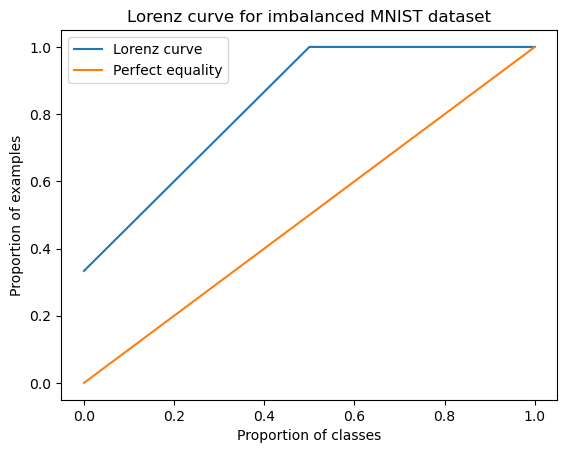

Gini coefficient: -0.6666666666666667


In [608]:
# Plot the Lorenz curve
plt.plot(lorenz_x, lorenz_y, label='Lorenz curve')
plt.plot([0, 1], [0, 1], label='Perfect equality')
plt.title('Lorenz curve for imbalanced MNIST dataset')
plt.xlabel('Proportion of classes')
plt.ylabel('Proportion of examples')
plt.legend()
plt.show()

print(f'Gini coefficient: {gini_coeff}')

In [515]:
np.save('x_train_imbalanced.npy', X_train_imbalanced)
np.save('y_train_imbalanced.npy', y_train_imbalanced)
np.save('x_test_imbalanced.npy', X_test_imbalanced)
np.save('y_test_imbalanced.npy', y_test_imbalanced)

In [8]:
x_train_imbalanced = np.load('x_train_imbalanced.npy')
y_train_imbalanced = np.load('y_train_imbalanced.npy')
x_test_imbalanced = np.load('X_test_imbalanced.npy')
y_test_imbalanced = np.load('y_test_imbalanced.npy')